In [158]:
import numpy as np
from sklearn.datasets import load_iris
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

In [38]:
dataDir='D:/'
file_name=dataDir + 'data1.csv'

fRead= open(file_name, 'r')

data=[]
for line in fRead:
    arr=line.strip('\n').split(',')
    data.append(arr)
data=data[1:]

In [124]:
features = []
label = []
for i in range(len(data)):
    try:
        float(data[i][1])
        features.append(data[i][0:28])
        label.append(data[i][28])
    except ValueError:
        continue
        
features = np.asarray(features,dtype=float)
label = np.asarray(label,dtype=int)

In [130]:
encoding_dim = 2  
input_img = Input(shape=(28,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(28, activation='tanh')(encoded)

In [132]:
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [133]:
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [134]:
autoencoder.fit(features,features,epochs=50,batch_size=256,shuffle=True,validation_split=0.2)

Train on 227845 samples, validate on 56962 samples
Epoch 1/50
227845/227845 [==============================] - 1s - loss: 1.0623 - val_loss: 0.9893
Epoch 2/50
227845/227845 [==============================] - 1s - loss: 0.9955 - val_loss: 0.9529
Epoch 3/50
227845/227845 [==============================] - 1s - loss: 0.9729 - val_loss: 0.9261
Epoch 4/50
227845/227845 [==============================] - 1s - loss: 0.9572 - val_loss: 0.9102
Epoch 5/50
227845/227845 [==============================] - 1s - loss: 0.9500 - val_loss: 0.9056
Epoch 6/50
227845/227845 [==============================] - 1s - loss: 0.9467 - val_loss: 0.9023
Epoch 7/50
227845/227845 [==============================] - 1s - loss: 0.9441 - val_loss: 0.8994
Epoch 8/50
227845/227845 [==============================] - 1s - loss: 0.9424 - val_loss: 0.8982
Epoch 9/50
227845/227845 [==============================] - 1s - loss: 0.9412 - val_loss: 0.8979
Epoch 10/50
227845/227845 [==============================] - 1s - loss: 0.94

In [156]:
reconstruction_error = np.array([])

encoded = encoder.predict(features)
decoded = np.asarray(decoder.predict(encoded))
error = features - decoded
for i in range(error.shape[0]):
    reconstruction_error = np.append(reconstruction_error, sum(error[i]))

In [195]:
#Save reconstruction error in order to compare in part 2
np.save('D:/Re_error_vinilla',reconstruction_error)

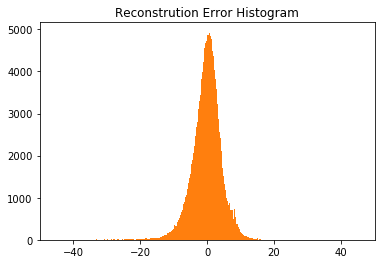

In [165]:
#Plotting Histogram
plt.hist(reconstruction_error,bins='auto')
plt.title('Reconstrution Error Histogram')
plt.xlim(-50,50)
plt.show()

In [177]:
#Index classifications
class1 = np.array([], dtype = int)
class2 = np.array([], dtype = int)
for i in range(label.shape[0]):
    if label[i]==0:
        class1 = np.append(class1, i)
    else:
        class2 = np.append(class2, i)

In [188]:
#Sample latent vectors
x = np.array([])
y = np.array([])
for i in range(encoded.shape[0]):
    x = np.append(x, encoded[i,0])
    y = np.append(y, encoded[i,1])

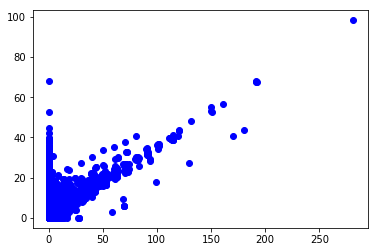

In [189]:
#Question 3
#Plotting latent vector
plt.figure()
plt.plot(x,y,'bo')
plt.show()

In [190]:
class1.dtype

dtype('int32')

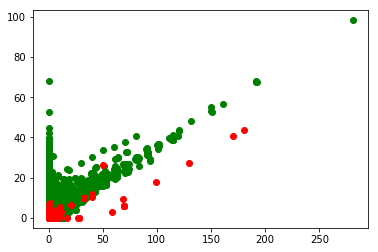

In [191]:
#Question 4
#Plotting scatter with label
plt.figure()
plt.plot(x[class1],y[class1],'go',x[class2],y[class2],'ro')
plt.show()